# Looking for the best hiperparameters

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import optuna
import h5py
import sys,os
import json
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [2]:
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

In [3]:
cd /home/users/cdonoso/astromer/ASTROMER/

/home/users/cdonoso/astromer/ASTROMER


In [17]:
hexps = [x.split('.')[0] for x in os.listdir('.') if x.endswith('.db')] 
single = hexps[2]

In [18]:
study = optuna.create_study(direction="maximize",
                           storage='sqlite:///{}.db'.format(single),
                           study_name='{}'.format(single),
                           load_if_exists=True)

[I 2021-11-16 10:52:56,710] Using an existing study with name 'alcock_mlp_att' instead of creating a new one.


In [19]:
print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Best trial:
  Value:  0.6559586614731613
  Params: 
    adam_learning_rate: 0.00018526038361236052
    n_layers: 2
    n_units_l0: 88
    n_units_l1: 601
    n_units_l2: 1096
    optimizer: Adam


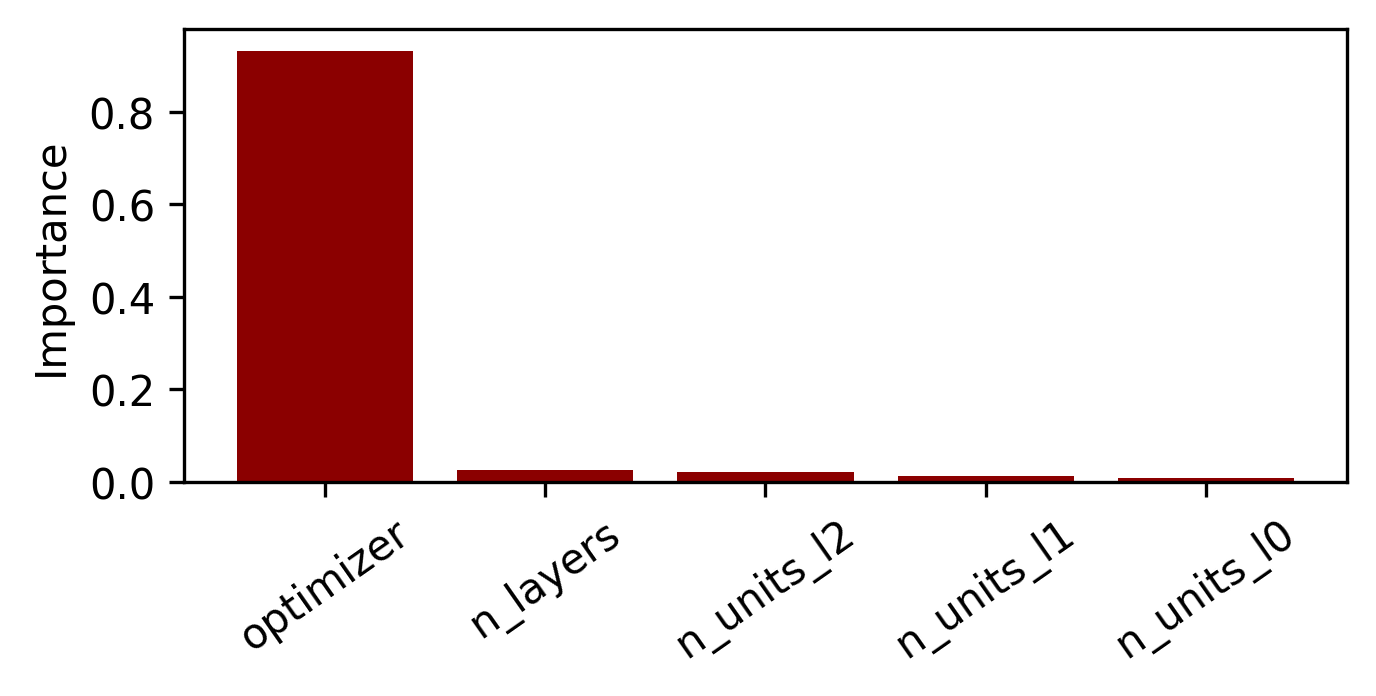

In [20]:
importances = optuna.importance.get_param_importances(study)
names = []
values = []
for key, value in importances.items():
    names.append(key)
    values.append(value)
plt.figure(figsize=(5,2), dpi=300)
plt.bar(range(len(names)), values, color='darkred')
plt.xticks(range(len(names)), names, rotation=35)
plt.ylabel('Importance')
plt.show()

In [21]:
from tensorflow.keras.optimizers import Adam, RMSprop

In [22]:
with open('{}.json'.format(single), 'w') as f:
    json.dump(trial.params, f)

In [23]:
plot_optimization_history(study)

In [36]:
plot_parallel_coordinate(study)